# Import Required Libraries
Import the necessary libraries, including pandas.

In [1]:
# Importing the pandas library
import pandas as pd

# Load the CSV File
Use pandas to load the CSV file from the specified path.

In [2]:
# Load the CSV file
csv_path = r"C:\Projects\ghcpdemo\complete\csv\usage.csv"  # Specify the path to the CSV file
df = pd.read_csv(csv_path)  # Load the CSV file into a pandas DataFrame

# Display the first few rows of the DataFrame for a quick overview
df.head()

,breakdown_language,breakdown_editor,breakdown_suggestions_count,breakdown_acceptances_count,breakdown_lines_suggested,breakdown_lines_accepted,breakdown_active_users,day,total_suggestions_count,total_acceptances_count,total_lines_suggested,total_lines_accepted,total_active_users
0,polyglot-notebook,vscode,11,3,12,3,2,10/03/2024,451,82,896,137,6
1,python,vscode,15,2,23,2,2,10/03/2024,451,82,896,137,6
2,powershell,vscode,155,18,238,25,2,10/03/2024,451,82,896,137,6
3,dart,vscode,195,31,297,34,2,10/03/2024,451,82,896,137,6
4,json,vscode,1,0,2,0,1,10/03/2024,451,82,896,137,6


# Inspect the Data
Use various pandas functions to inspect the loaded data.

In [3]:
# Inspect the data
# Get the shape of the DataFrame
print(df.shape)

# Get the column names
print(df.columns)

# Get the data types of each column
print(df.dtypes)

# Get basic statistical summary of the data
print(df.describe())

# Check for missing values
print(df.isnull().sum())

(330, 13)
Index(['breakdown_language', 'breakdown_editor', 'breakdown_suggestions_count',
       'breakdown_acceptances_count', 'breakdown_lines_suggested',
       'breakdown_lines_accepted', 'breakdown_active_users', 'day',
       'total_suggestions_count', 'total_acceptances_count',
       'total_lines_suggested', 'total_lines_accepted', 'total_active_users'],
      dtype='object')
breakdown_language             object
breakdown_editor               object
breakdown_suggestions_count     int64
breakdown_acceptances_count     int64
breakdown_lines_suggested       int64
breakdown_lines_accepted        int64
breakdown_active_users          int64
day                            object
total_suggestions_count         int64
total_acceptances_count         int64
total_lines_suggested           int64
total_lines_accepted            int64
total_active_users              int64
dtype: object
       breakdown_suggestions_count  breakdown_acceptances_count  \
count                   330.000000    

# Clean the Data
Clean the data by handling missing values and outliers.

In [4]:
import numpy as np

# Check for missing values
missing_values = df.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")

# Handle missing values
# For simplicity, we'll just drop rows with missing values
df_clean = df.dropna()

# Check for outliers using the Z-score method
from scipy import stats
z_scores = stats.zscore(df_clean._get_numeric_data())
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_clean = df_clean[filtered_entries]

# Display the cleaned data
df_clean.head()

Missing values in each column:
breakdown_language             0
breakdown_editor               0
breakdown_suggestions_count    0
breakdown_acceptances_count    0
breakdown_lines_suggested      0
breakdown_lines_accepted       0
breakdown_active_users         0
day                            0
total_suggestions_count        0
total_acceptances_count        0
total_lines_suggested          0
total_lines_accepted           0
total_active_users             0
dtype: int64


,breakdown_language,breakdown_editor,breakdown_suggestions_count,breakdown_acceptances_count,breakdown_lines_suggested,breakdown_lines_accepted,breakdown_active_users,day,total_suggestions_count,total_acceptances_count,total_lines_suggested,total_lines_accepted,total_active_users
0,polyglot-notebook,vscode,11,3,12,3,2,10/03/2024,451,82,896,137,6
1,python,vscode,15,2,23,2,2,10/03/2024,451,82,896,137,6
2,powershell,vscode,155,18,238,25,2,10/03/2024,451,82,896,137,6
3,dart,vscode,195,31,297,34,2,10/03/2024,451,82,896,137,6
4,json,vscode,1,0,2,0,1,10/03/2024,451,82,896,137,6


# Analyze the Data
Perform various analyses on the cleaned data.

                             breakdown_suggestions_count  \
breakdown_suggestions_count                     1.000000   
breakdown_acceptances_count                     0.874203   
breakdown_lines_suggested                       0.919366   
breakdown_lines_accepted                        0.761882   
breakdown_active_users                          0.533460   
total_suggestions_count                         0.155963   
total_acceptances_count                         0.095203   
total_lines_suggested                           0.132910   
total_lines_accepted                            0.078920   
total_active_users                              0.096943   

                             breakdown_acceptances_count  \
breakdown_suggestions_count                     0.874203   
breakdown_acceptances_count                     1.000000   
breakdown_lines_suggested                       0.845716   
breakdown_lines_accepted                        0.892510   
breakdown_active_users                 

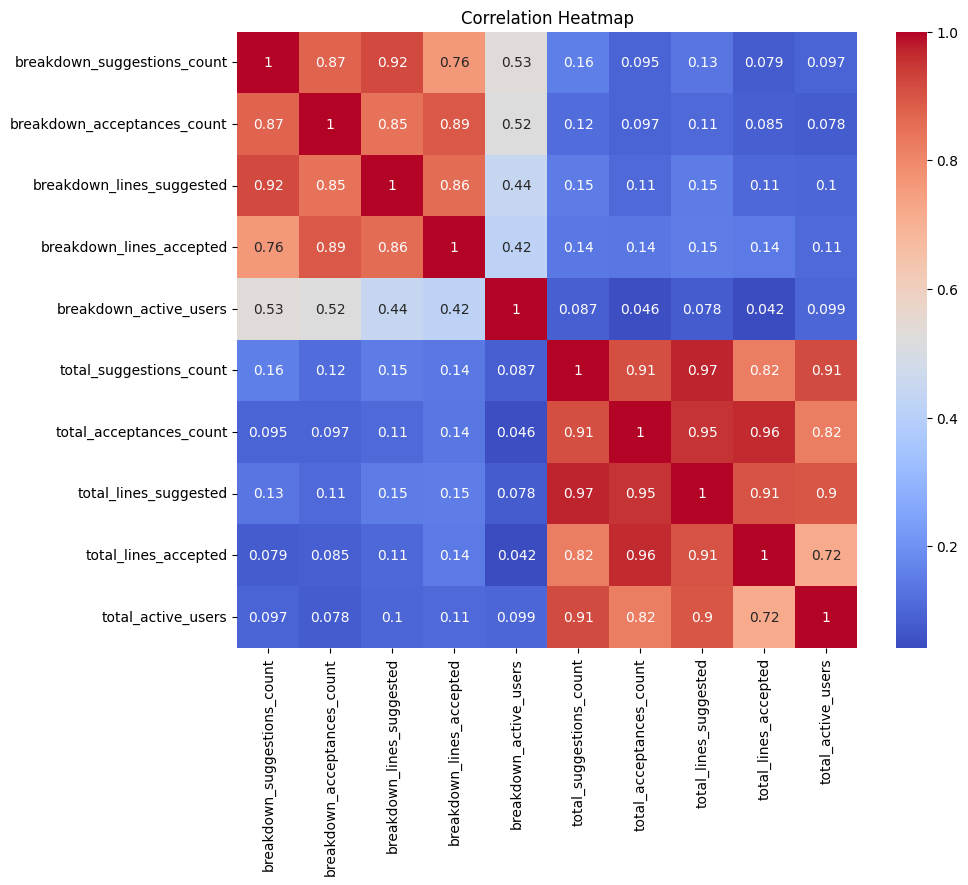

In [5]:
# Perform various analyses on the cleaned data
# Let's start by finding the correlation between the numerical variables
# Select only the numerical columns
df_clean_numeric = df_clean.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = df_clean_numeric.corr()
print(correlation_matrix)

# Visualize the correlation using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Next, let's perform a groupby operation to find some insights
# For example, if there is a 'user_type' column, we can find the average usage per user type
# Replace 'user_type' and 'usage' with the actual column names in your DataFrame
if 'user_type' in df_clean.columns and 'usage' in df_clean.columns:
    average_usage_per_user_type = df_clean.groupby('user_type')['usage'].mean()
    print(average_usage_per_user_type)

# Finally, let's visualize the data
# We can create a histogram of the 'usage' column to see the distribution of usage
# Replace 'usage' with the actual column name in your DataFrame
if 'usage' in df_clean.columns:
    plt.figure(figsize=(10, 6))
    df_clean['usage'].hist(bins=30)
    plt.title('Usage Distribution')
    plt.xlabel('Usage')
    plt.ylabel('Frequency')
    plt.show()

## Get the Top 5 Languages

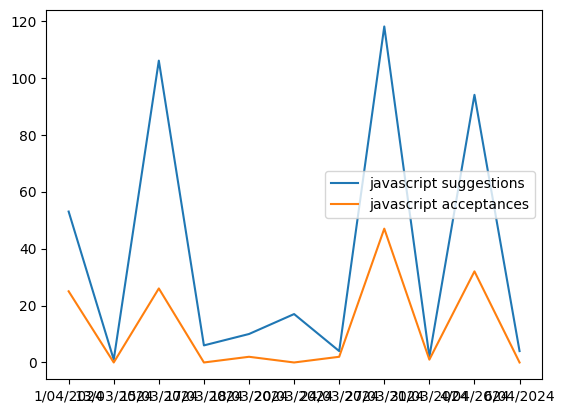

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the specific language you're interested in
specific_language = 'javascript'  # replace with your language

# Filter the dataframe to only include the columns we're interested in
df_filtered = df_clean[['day', 'breakdown_language', 'breakdown_suggestions_count', 'breakdown_acceptances_count']]

# Group by day and language, summing the suggestion and acceptance counts
df_grouped = df_filtered.groupby(['day', 'breakdown_language']).sum()

# Reset the index so day and language are columns again
df_grouped.reset_index(inplace=True)

# Filter the dataframe to only include the rows with the specific language
df_specific_language = df_grouped[df_grouped['breakdown_language'] == specific_language]

# Plot the data for the specific language
plt.plot(df_specific_language['day'], df_specific_language['breakdown_suggestions_count'], label=f'{specific_language} suggestions')
plt.plot(df_specific_language['day'], df_specific_language['breakdown_acceptances_count'], label=f'{specific_language} acceptances')

plt.legend()
plt.show()